<a href="https://colab.research.google.com/github/mannodiarun/MSE570/blob/main/MC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

N = 50
x_all = [0.0]*N
y_all = [0.0]*N
box = 1

k=0
for i in range (0,int(N/5)):
    for j in range(0,int(N/10)):
        x_all[k] = i*0.1*box
        if math.fmod(i,2) == 0.0:
#            y_all[k] = j*0.2*box + (np.random.rand()-0.5)*0.1
            y_all[k] = j*0.2*box
        else:
#            y_all[k] = j*0.2*box + 0.1 + (np.random.rand()-0.5)*0.1
            y_all[k] = j*0.2*box + 0.1
        k=k+1

x_start = [0.0]*N
y_start = [0.0]*N
for i in range (0,N):
    x_start[i] = x_all[i]
    y_start[i] = y_all[i]

kB = 1
T = 1
beta = 1/(kB*T)
v = -1


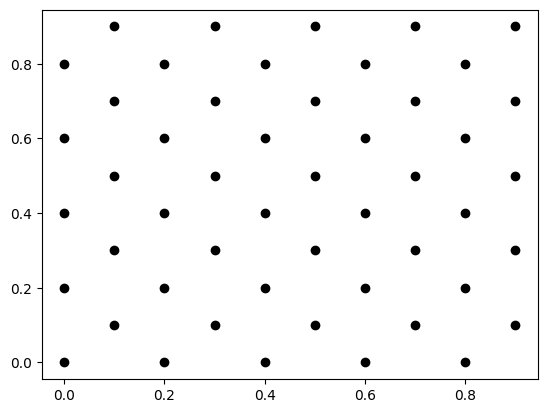

In [ ]:
##  Visualize starting configuration  ##

for i in range(0,N):
    plt.scatter(x_start[i],y_start[i],c='k')
plt.show()


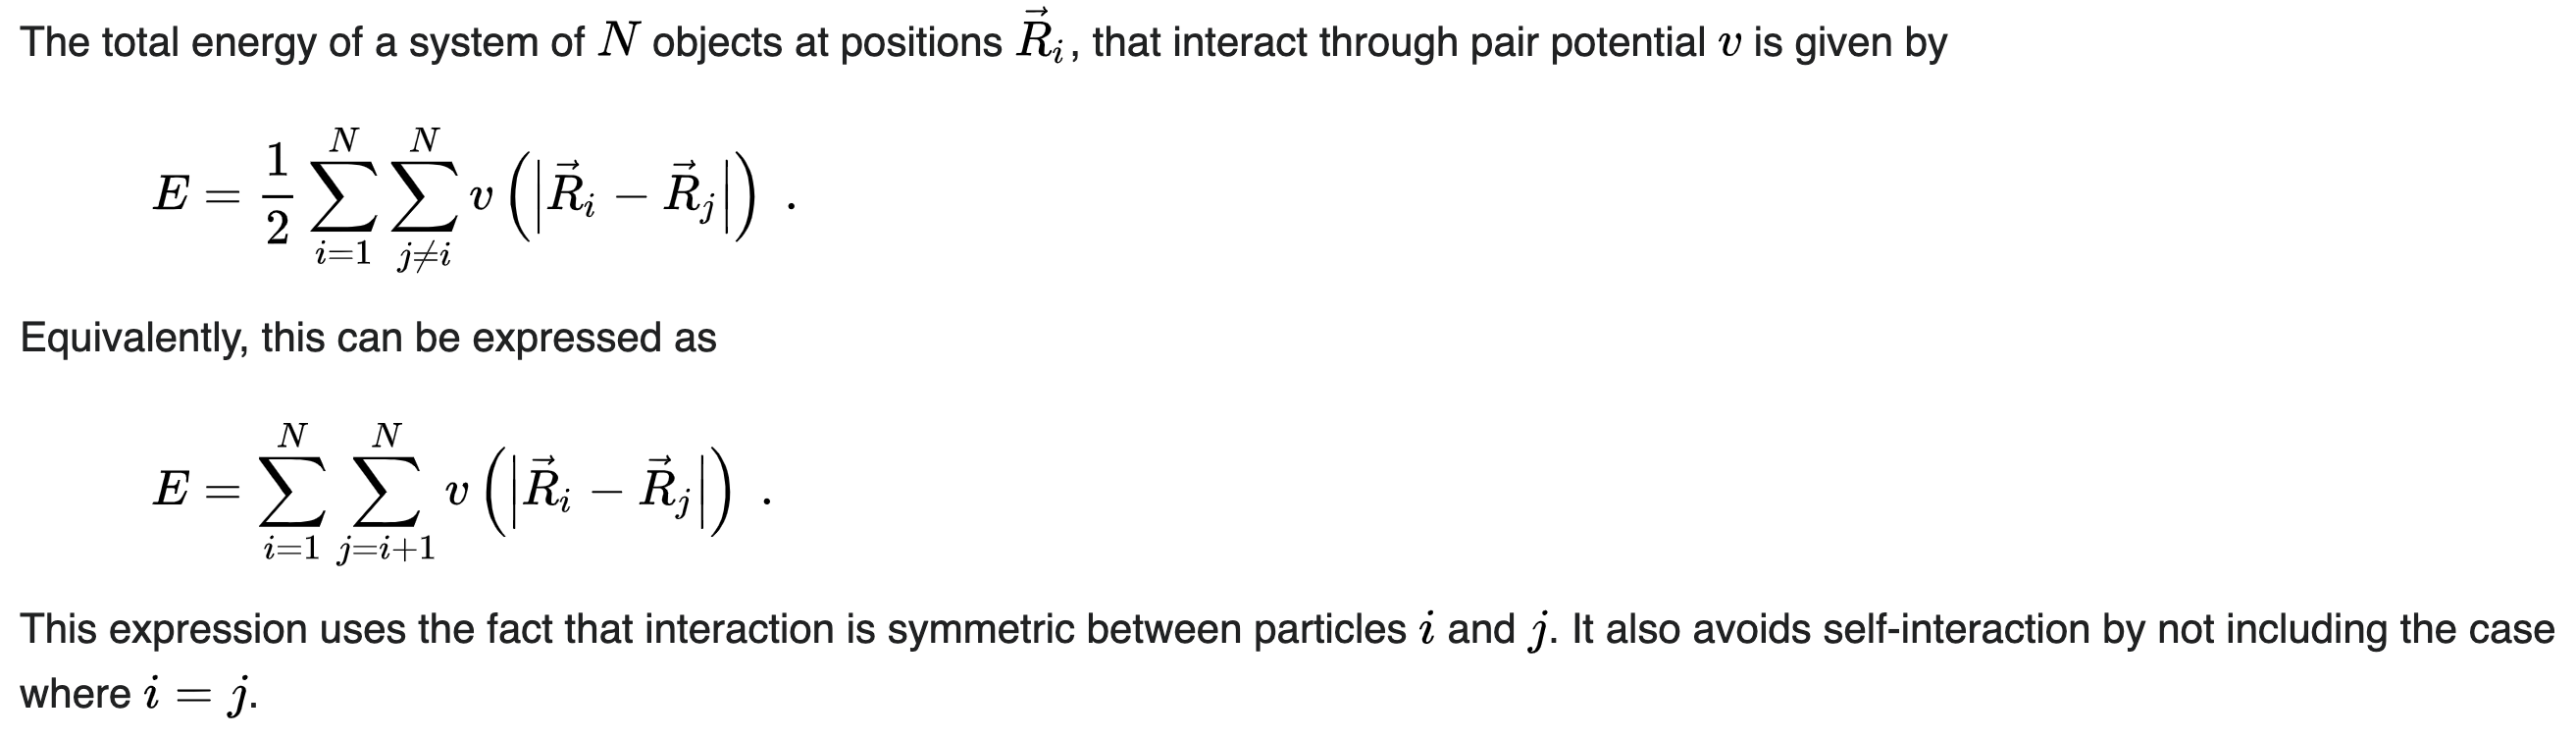

In [ ]:
###  Use this for Simple Pairwise Potential  ##
###  (https://en.wikipedia.org/wiki/Pair_potential)

def energy(x_all,y_all):

    en = 0

    for i in range (0,N-1):
        for j in range (i+1,N):
            xr = x_all[i] - x_all[j]
            xr = xr - box*np.round(xr/box)
            yr = y_all[i] - y_all[j]
            yr = yr - box*np.round(yr/box)
            r = np.sqrt(xr*xr + yr*yr)
            en = en + v*r

    return(en)


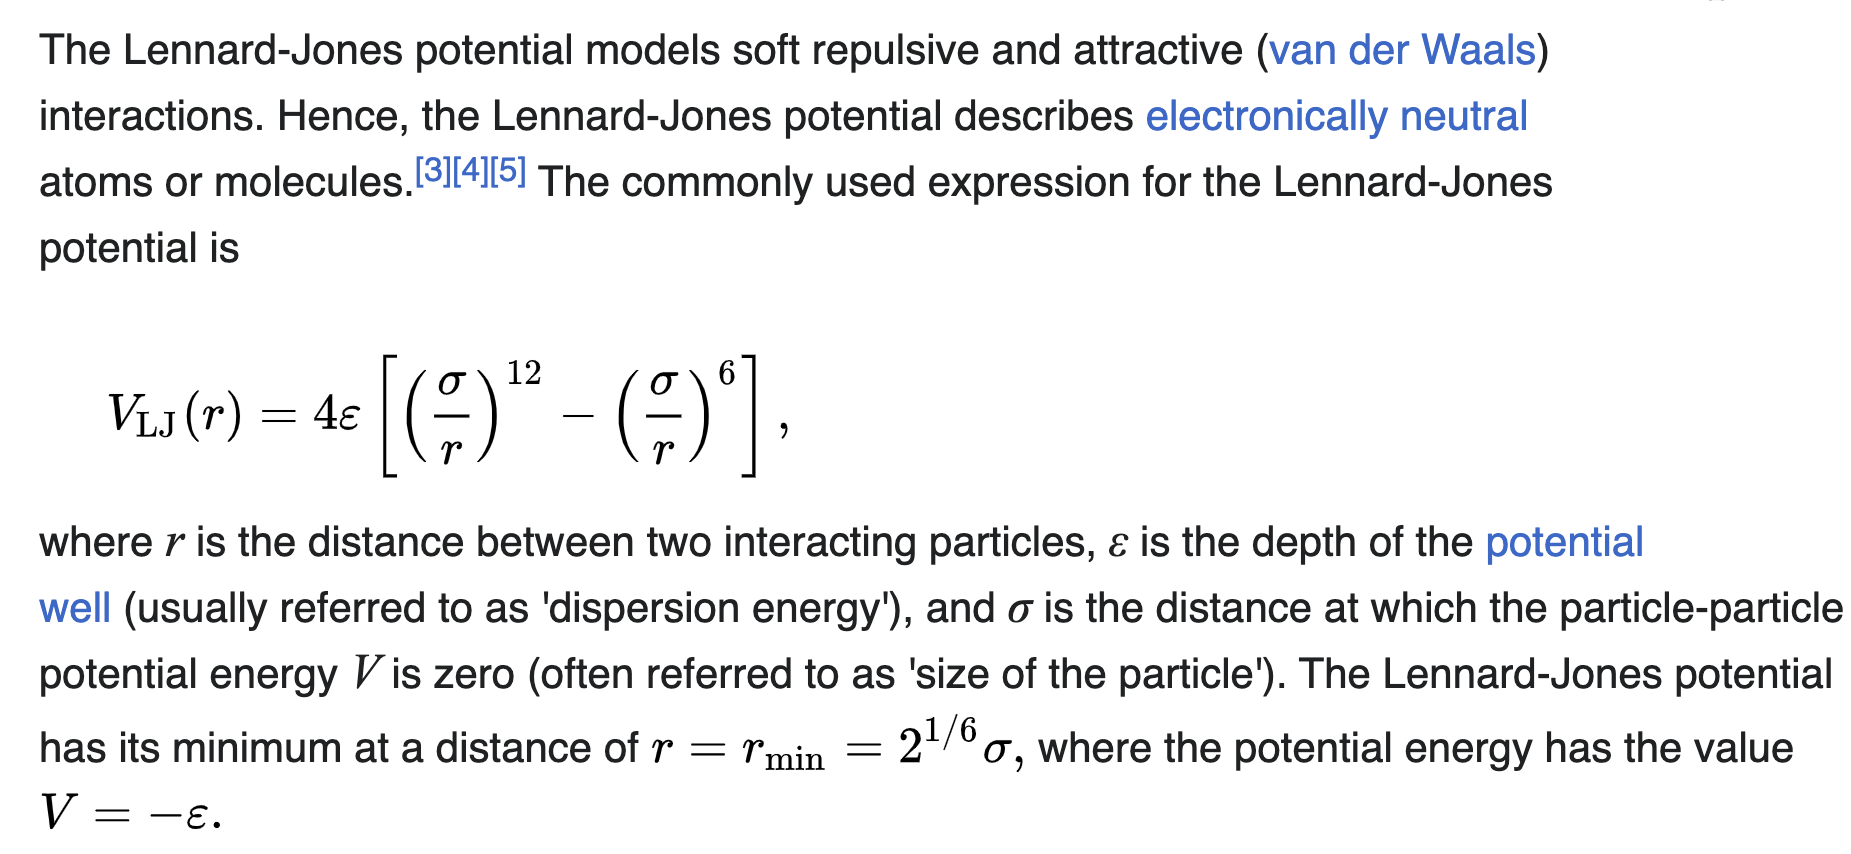

In [ ]:
###  Use this for Lennard Jones Potential  ##
###  (https://en.wikipedia.org/wiki/Lennard-Jones_potential)

def energy(x_all,y_all):

    en = 0
    forces_x = [0.0]*N
    forces_y = [0.0]*N
    rc = 0.2

    for i in range (0,N-1):
        for j in range (i+1,N):
            xr = x_all[i] - x_all[j]
            xr = xr - box*np.round(xr/box)
            yr = y_all[i] - y_all[j]
            yr = yr - box*np.round(yr/box)

            r2 = xr*xr + yr*yr

            if r2 <= rc*rc:
                r2i = 1/r2
                r6i = np.power(r2i,3)
                ff = 48*r2i*r6i*(r6i-0.5)
                forces_x[i] = forces_x[i] + ff*xr
                forces_x[j] = forces_x[j] - ff*xr
                forces_y[i] = forces_y[i] + ff*yr
                forces_y[j] = forces_y[j] - ff*yr
                en = (en + 4*r6i*(r6i-1))

    return(en)


In [ ]:
def mcmove(x_all,y_all):

    rr = np.random.rand()

    o = int(rr*N)
    temp_x = x_all[o]
    temp_y = y_all[o]

    eno = energy(x_all,y_all)

    x_all[o] = x_all[o] + (rr-0.5)*0.005
    y_all[o] = y_all[o] + (rr-0.5)*0.005

    enn = energy(x_all,y_all)

    if ( rr < min(np.exp(-beta*(enn-eno)),1) ):
        eno = enn
    else:
        x_all[0] = temp_x
        y_all[0] = temp_y

    return(x_all,y_all)


In [ ]:
def sample(k,x,y):

    return(k, energy(x,y))


In [ ]:
def mc(x_start,y_start,ncycl,nsamp):

    k = 0
    x = x_start
    y = y_start
    cycles = [0]*int(ncycl/nsamp)
    energies = [0]*int(ncycl/nsamp)

    for icycl in range(0,ncycl):
        if math.fmod(icycl, nsamp) == 0.0:
            k = int(icycl/nsamp)
            cyc, en = sample(k,x,y)
            cycles[k] = cyc*nsamp
            energies[k] = en
            x,y = mcmove(x_all,y_all)

    plt.plot(cycles[:], energies[:])

    return()


()

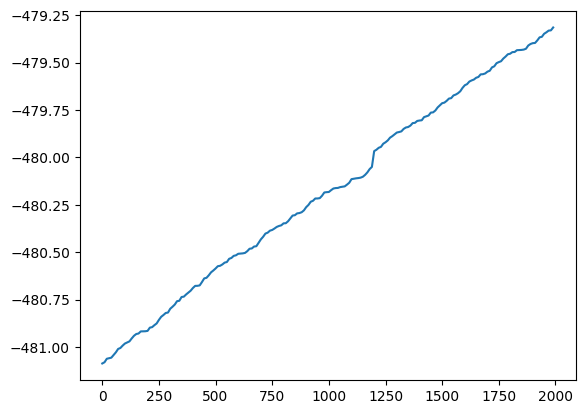

In [ ]:
ncycl = 2000
nsamp = 10

mc(x_start,y_start,ncycl,nsamp)


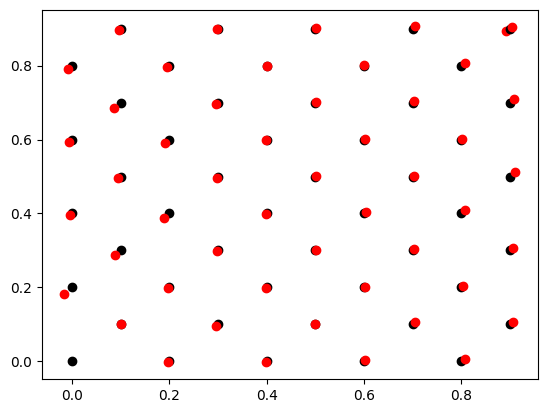

In [ ]:
for i in range(0,N):
    plt.scatter(x_start[i],y_start[i],c='k')
    plt.scatter(x_all[i],y_all[i],c='r')
plt.show()
